In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import folium  # For spatial analysis


In [39]:
# Upload kaggle.json
from google.colab import files
files.upload()

# Set up Kaggle configuration
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d nelgiriyewithana/global-weather-repository --unzip


Saving GlobalWeatherRepository.csv to GlobalWeatherRepository.csv
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository
License(s): other
  0% 0.00/3.85M [00:00<?, ?B/s]
100% 3.85M/3.85M [00:00<00:00, 135MB/s]


In [41]:
# Load the dataset into a DataFrame
df = pd.read_csv("/content/GlobalWeatherRepository.csv")

# Display basic info about the dataset
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns.tolist())
df.head()


Dataset Shape: (49696, 41)
Column Names: ['country', 'location_name', 'latitude', 'longitude', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius', 'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [42]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Handle missing values for numeric columns
imputer = SimpleImputer(strategy='median')
df_numeric_cleaned = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Combine numeric and non-numeric columns back
df_cleaned = pd.concat([df_numeric_cleaned, df[non_numeric_cols].reset_index(drop=True)], axis=1)

# Scale numeric columns
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric_cleaned), columns=numeric_cols)

print("Data Cleaning and Scaling Completed.")
df_scaled.head()


Data Cleaning and Scaling Completed.


,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,0.719014,0.689521,0.0,0.694595,0.693694,0.003317,0.003277,0.938719,0.413793,0.415205,...,0.003944,0.210236,0.214271,0.002572,0.950464,0.005090,0.004509,0.0,0.0,0.55
1,0.783594,0.550251,0.0,0.591892,0.591592,0.002556,0.002568,0.888579,0.413793,0.412281,...,0.004989,0.208530,0.202413,0.002104,0.950455,0.000567,0.000310,0.0,0.0,0.55
2,0.740256,0.502934,0.0,0.645946,0.645646,0.003915,0.003886,0.777159,0.405172,0.403509,...,0.006303,0.215631,0.025380,0.152209,0.951719,0.006329,0.003110,0.0,0.0,0.55
3,0.794689,0.498617,0.0,0.420270,0.419670,0.002828,0.002804,0.596100,0.370690,0.374269,...,0.003404,0.208051,0.133971,0.003741,0.950464,0.000319,0.000122,0.0,0.0,0.55
4,0.307824,0.531657,0.0,0.686486,0.686186,0.003208,0.003176,0.415042,0.405172,0.403509,...,0.005595,0.265209,0.039526,0.169979,0.953440,0.113522,0.044746,0.8,1.0,0.55


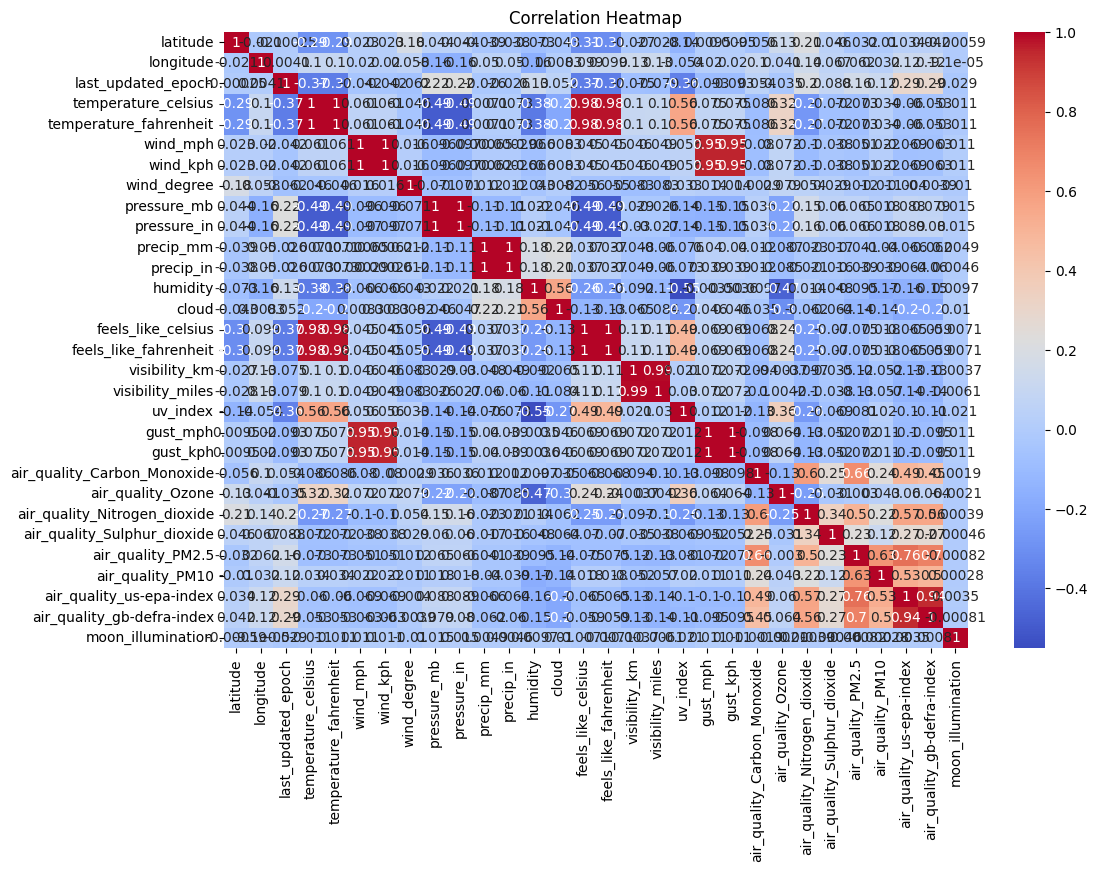

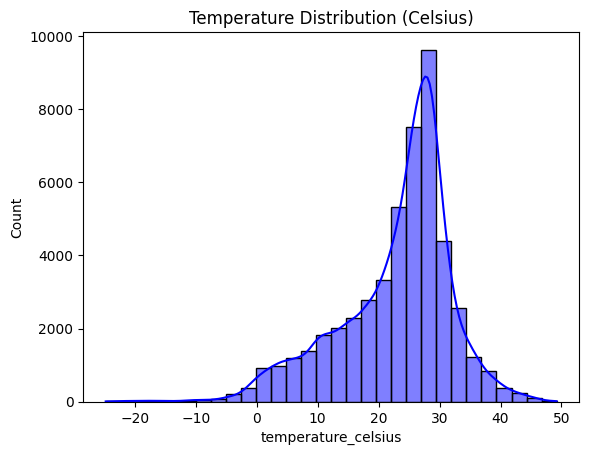

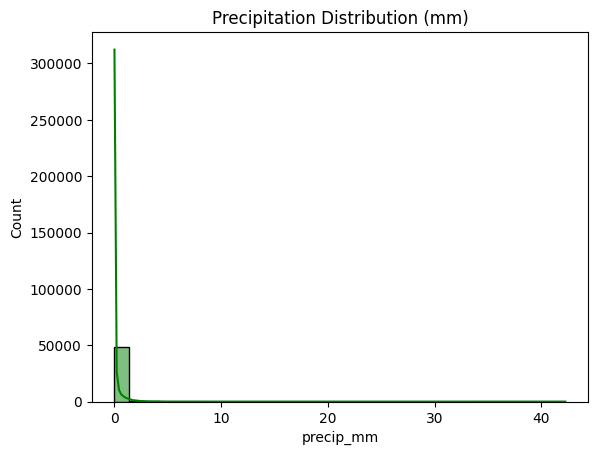

In [43]:
# Correlation heatmap for numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric_cleaned.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Distribution plots for temperature and precipitation
sns.histplot(df_cleaned['temperature_celsius'], kde=True, color='blue', bins=30)
plt.title("Temperature Distribution (Celsius)")
plt.show()

sns.histplot(df_cleaned['precip_mm'], kde=True, color='green', bins=30)
plt.title("Precipitation Distribution (mm)")
plt.show()


Number of data points: 257


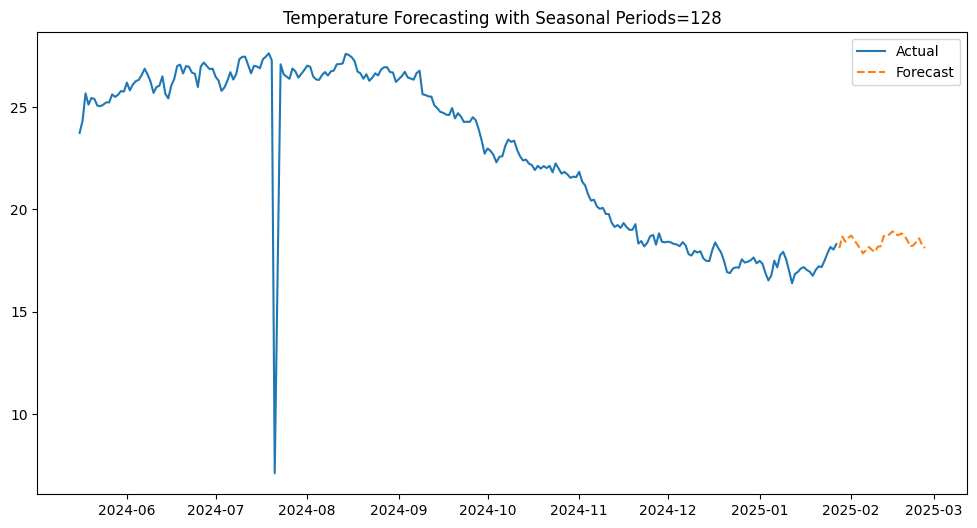

In [46]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Check the length of temperature_data
print("Number of data points:", len(temperature_data))

# Reduce seasonal_periods to fit the available data
seasonal_periods = min(len(temperature_data) // 2, 365)  # At least two cycles are needed

# Fit the model
model = ExponentialSmoothing(temperature_data, seasonal="add", seasonal_periods=seasonal_periods)
fitted_model = model.fit()

# Forecast the next 30 days
forecast = fitted_model.forecast(30)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(temperature_data, label="Actual")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.title(f"Temperature Forecasting with Seasonal Periods={seasonal_periods}")
plt.legend()
plt.show()


Number of weekly data points: 38


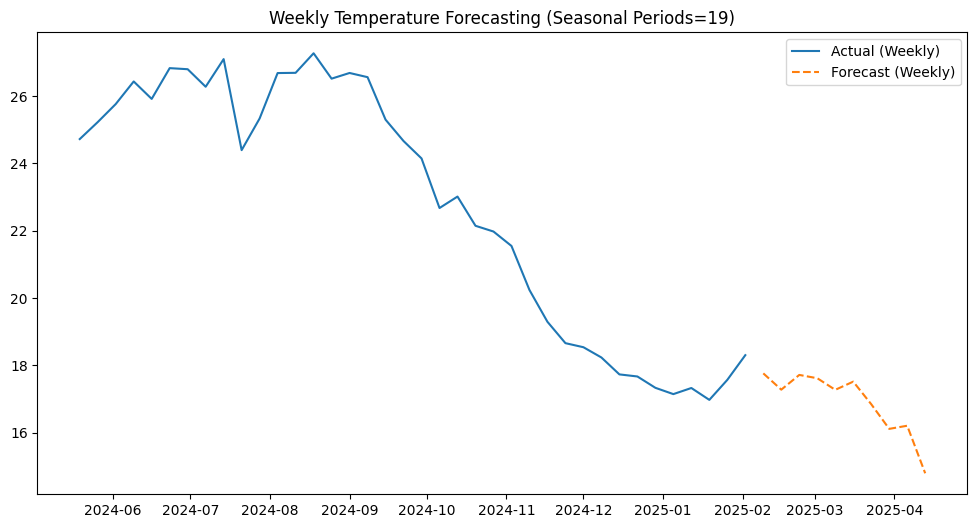

In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Resample data to weekly mean
temperature_data_weekly = temperature_data.resample('W').mean()

# Check the number of data points
print("Number of weekly data points:", len(temperature_data_weekly))

# Dynamically adjust seasonal_periods based on available data
seasonal_periods = min(len(temperature_data_weekly) // 2, 52)  # Ensure at least two full cycles

# Ensure seasonal_periods is valid
if seasonal_periods < 2:
    print("Not enough data for seasonal modeling. Proceeding with trend-only model.")
    model_weekly = ExponentialSmoothing(temperature_data_weekly, trend="add")
else:
    # Fit the model with seasonal components
    model_weekly = ExponentialSmoothing(
        temperature_data_weekly,
        trend="add",
        seasonal="add",
        seasonal_periods=seasonal_periods
    )

# Fit the model
fitted_model_weekly = model_weekly.fit()

# Forecast the next 10 weeks
forecast_weekly = fitted_model_weekly.forecast(10)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(temperature_data_weekly, label="Actual (Weekly)")
plt.plot(forecast_weekly, label="Forecast (Weekly)", linestyle="--")
plt.title(f"Weekly Temperature Forecasting (Seasonal Periods={seasonal_periods})")
plt.legend()
plt.show()


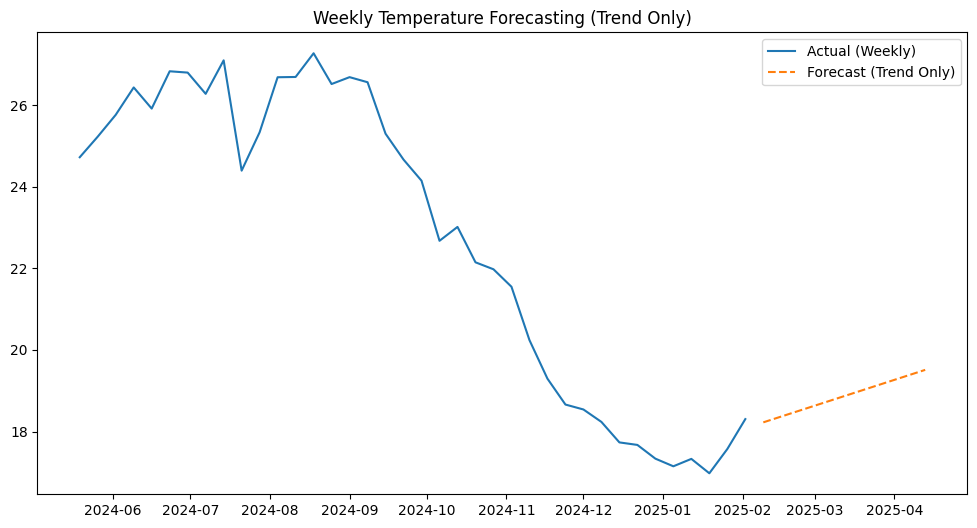

In [50]:
# Fit a trend-only model
model_trend = ExponentialSmoothing(temperature_data_weekly, trend="add")
fitted_model_trend = model_trend.fit()

# Forecast the next 10 weeks
forecast_trend = fitted_model_trend.forecast(10)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(temperature_data_weekly, label="Actual (Weekly)")
plt.plot(forecast_trend, label="Forecast (Trend Only)", linestyle="--")
plt.title("Weekly Temperature Forecasting (Trend Only)")
plt.legend()
plt.show()


In [52]:
# Save cleaned and scaled data
df_cleaned.to_csv("Cleaned_Weather_Data.csv", index=False)
df_scaled.to_csv("Scaled_Weather_Data.csv", index=False)

print("Cleaned and scaled data saved successfully.")


Cleaned and scaled data saved successfully.


In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df_numeric = df.select_dtypes(include=["float", "int"])
df_numeric_cleaned = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)
df.update(df_numeric_cleaned)


In [55]:
from scipy.stats import zscore
df_zscore = df_numeric[(zscore(df_numeric) < 3).all(axis=1)]


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)


Exploratory Data Analysis (EDA)
Uncover Trends, Correlations, and Patterns

In [59]:
df["last_updated"] = pd.to_datetime(df["last_updated"])
df.set_index("last_updated", inplace=True)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


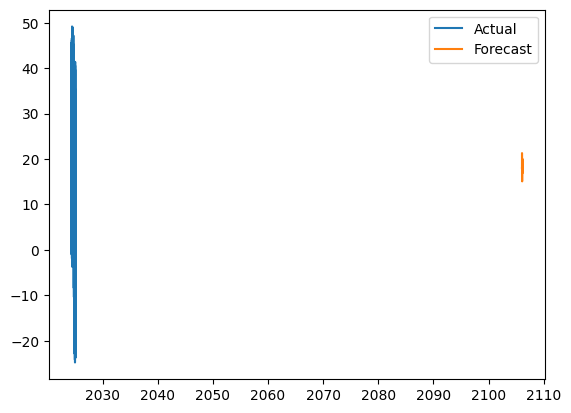

In [60]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(df["temperature_celsius"], seasonal="add", seasonal_periods=365)
fitted_model = model.fit()
forecast = fitted_model.forecast(30)
plt.plot(df["temperature_celsius"], label="Actual")
plt.plot(forecast, label="Forecast")
plt.legend()
plt.show()


In [61]:
anomalies = df[(zscore(df["temperature_celsius"]) > 3)]


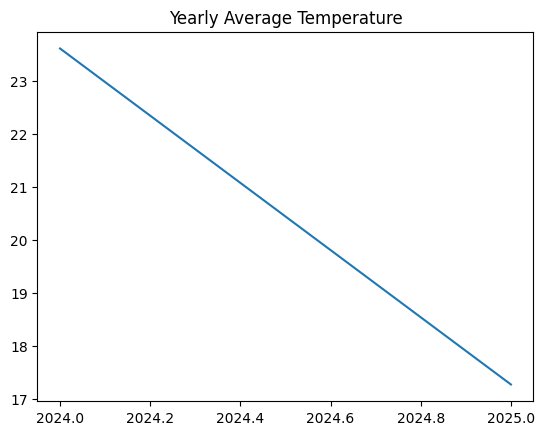

In [62]:
df["year"] = df.index.year
yearly_avg = df.groupby("year")["temperature_celsius"].mean()
plt.plot(yearly_avg)
plt.title("Yearly Average Temperature")
plt.show()


In [65]:
import folium
from folium.plugins import HeatMap
weather_map = folium.Map(location=[0, 0], zoom_start=2)
HeatMap(data=df[["latitude", "longitude", "temperature_celsius"]].values.tolist()).add_to(weather_map)
weather_map.save("weather_map.html")


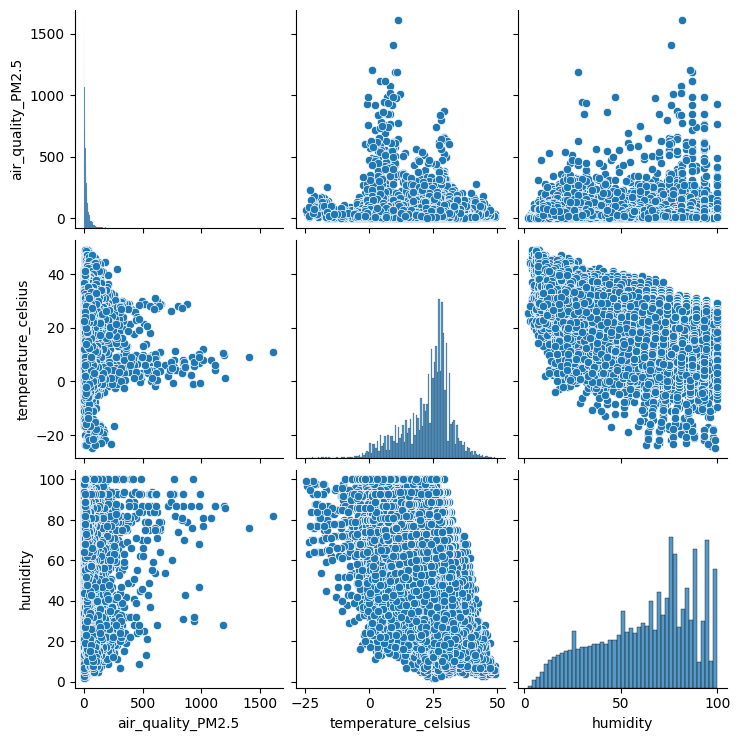

In [66]:
sns.pairplot(df, vars=["air_quality_PM2.5", "temperature_celsius", "humidity"])


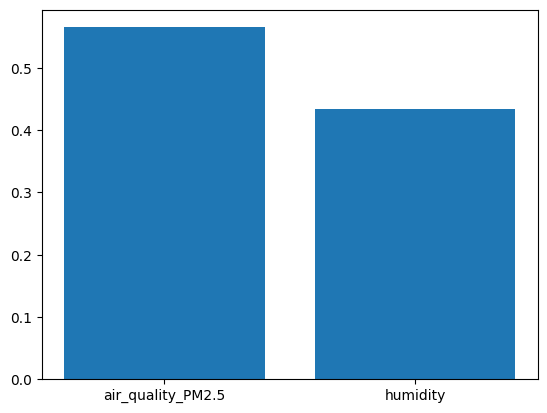

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'temperature_celsius' is the target variable
# Select features and target
X = df[['air_quality_PM2.5', 'humidity']]  # Replace with your desired features
y = df['temperature_celsius']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Create and fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
importance = model.feature_importances_

# Plot feature importances
plt.bar(X_train.columns, importance)
plt.show()

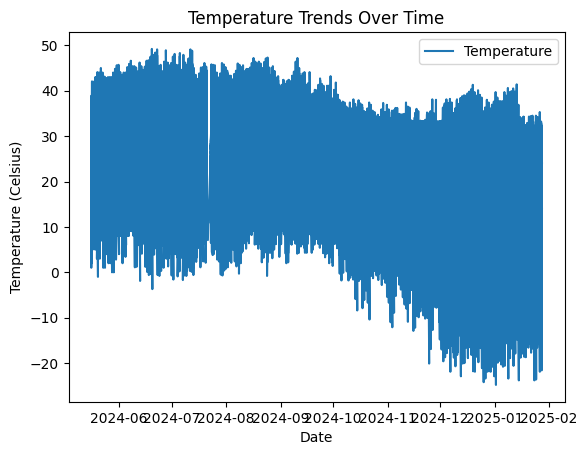

In [71]:
import os

# Create a folder for plots if it doesn't exist
if not os.path.exists("plots"):
    os.makedirs("plots")

# Save plots
import matplotlib.pyplot as plt

# Example: Saving a temperature trend plot
plt.plot(df["temperature_celsius"], label="Temperature")
plt.title("Temperature Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (Celsius)")
plt.legend()
plt.savefig("plots/temperature_trend.png")  # Save the plot
plt.show()
